Implementation of LSTM Model on AUD_USD_D prediction of the close price 1 hour ahead based on data of previous 10 hours

## 1. Data Preparation

### 1.1 Read in data file

In [1]:
import talib as ta

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from utils import series_to_supervised

In [2]:
data = pd.read_csv('../data/AUD_USD_D.csv')
data

,datetime,open,high,low,close
0,2005-01-01T22:00:00.000000000Z,0.78230,0.78280,0.78060,0.78060
1,2005-01-02T22:00:00.000000000Z,0.78070,0.78390,0.77265,0.77835
2,2005-01-03T22:00:00.000000000Z,0.77835,0.78015,0.76360,0.76490
3,2005-01-04T22:00:00.000000000Z,0.76500,0.76840,0.75940,0.76480
4,2005-01-05T22:00:00.000000000Z,0.76480,0.76510,0.75770,0.76080
...,...,...,...,...,...
4815,2021-02-21T22:00:00.000000000Z,0.78715,0.79292,0.78554,0.79162
4816,2021-02-22T22:00:00.000000000Z,0.79146,0.79347,0.78804,0.79115
4817,2021-02-23T22:00:00.000000000Z,0.79129,0.79732,0.78954,0.79682
4818,2021-02-24T22:00:00.000000000Z,0.79676,0.80072,0.78590,0.78719


### 1.2 Datetime formatting

In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'] = data['datetime'].dt.date
# data['datetime'] = data['datetime'].dt.tz_localize(None)
data.set_index('datetime', inplace=True)
data

,open,high,low,close
datetime,,,,
2005-01-01,0.78230,0.78280,0.78060,0.78060
2005-01-02,0.78070,0.78390,0.77265,0.77835
2005-01-03,0.77835,0.78015,0.76360,0.76490
2005-01-04,0.76500,0.76840,0.75940,0.76480
2005-01-05,0.76480,0.76510,0.75770,0.76080
...,...,...,...,...
2021-02-21,0.78715,0.79292,0.78554,0.79162
2021-02-22,0.79146,0.79347,0.78804,0.79115
2021-02-23,0.79129,0.79732,0.78954,0.79682


## 2. Add Arima as feature

In [4]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as st 
order = st.arma_order_select_ic(data['close'],max_ar=5,max_ma=5,ic=['aic'])
print(order.aic_min_order)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


(4, 5)


In [5]:
from statsmodels.tsa.arima_model import ARIMA

p,q = order.aic_min_order[0], order.aic_min_order[1]

model_AIC = ARIMA(data['close'], order=(p, 1, q))
results_AIC_ARIMA = model_AIC.fit(disp=-1)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [6]:
# Get Fitted Series
fitted_AIC = results_AIC_ARIMA.predict(typ = 'levels', dynamic = False)

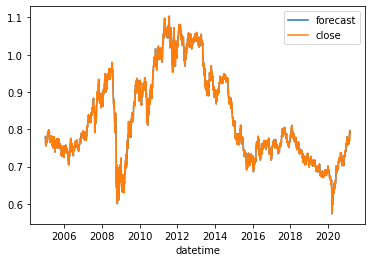

In [7]:
# Actual vs Fitted
# plt.figure(figsize=(20,6))

results_AIC_ARIMA.plot_predict(dynamic=False)
plt.show()

In [8]:
# data['arima'] = fitted_AIC

In [9]:
res_list = [np.nan]
# fitted_AIC.tolist()
res_list.extend(fitted_AIC.tolist())
data['arima'] = res_list

In [13]:
data = data[['close', 'arima']]

In [16]:
data.dropna(axis=0, inplace=True)

<ipython-input-16-1edeb318a43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


In [18]:
data.reset_index(inplace=True, drop=True)

In [22]:
data

,close,arima
0,0.77835,0.780598
1,0.76490,0.778425
2,0.76480,0.765258
3,0.76080,0.764286
4,0.75750,0.760864
...,...,...
4814,0.79162,0.786748
4815,0.79115,0.791937
4816,0.79682,0.791148
4817,0.78719,0.796898


## 3. Data Processing

In [70]:
train_split_frac = 0.8
val_split_frac = 0.9

train_split = int(train_split_frac * int(data.shape[0]))  ## end of train index (exclusive)
val_split = int(val_split_frac * int(data.shape[0]))      ## end of val index (exclusive)

In [71]:
step = 1
past = 10
future = 1
learning_rate = 0.00001
batch_size = 1
epochs = 1000

y = data[['close']]

In [72]:
training_data = data[: train_split].values
validation_data = data[train_split: val_split].values
test_data = data[val_split:].values

In [73]:
print('Shape of training_data:   ', training_data.shape)
print('Shape of validation_data: ', validation_data.shape)
print('Shape of test_data:       ', test_data.shape)

Shape of training_data:    (3855, 2)
Shape of validation_data:  (482, 2)
Shape of test_data:        (482, 2)


In [74]:
training_data


array([[0.77835   , 0.78059772],
       [0.7649    , 0.77842473],
       [0.7648    , 0.7652577 ],
       ...,
       [0.75477   , 0.7548991 ],
       [0.753     , 0.75493899],
       [0.75416   , 0.75309478]])

### 3.1 Training dataset

In [75]:
train_y_start = past + future
train_y_end = train_y_start + train_split

In [76]:
x_train = training_data
y_train = y.iloc[train_y_start: train_y_end].values

In [77]:
sequence_length = int(past / step)

In [78]:
import tensorflow as tf
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 3.2 Validation dataset

In [79]:
val_y_start = train_y_end
val_y_end = train_y_start + val_split

In [80]:
x_val = validation_data
y_val = y.iloc[val_y_start: val_y_end].values

In [81]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 3.3 Test dataset

In [82]:
x_end = len(test_data) - past - future

In [83]:
test_y_start = val_y_end

In [84]:
x_test = test_data[: x_end]
y_test = y.iloc[test_y_start: ].values

In [85]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=1,
)

### 3.4 Input and output shape

In [86]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (1, 10, 2)
Target shape: (1, 1)


## 4. Experiment 1: Prediction with arima result as feature

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import keras

In [88]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(200)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model1 = keras.Model(inputs=inputs, outputs=outputs)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 2)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               162400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 162,601
Trainable params: 162,601
Non-trainable params: 0
_________________________________________________________________


In [94]:
path_checkpoint1 = "model_checkpoint_arima_1.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=15)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint1,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model1.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/1000
3846/3846 [==============================] - 24s 6ms/step - loss: 1.8658e-04 - val_loss: 1.4980e-04

Epoch 00001: val_loss improved from inf to 0.00015, saving model to model_checkpoint_arima_1.h5
Epoch 2/1000
3846/3846 [==============================] - 24s 6ms/step - loss: 1.8450e-04 - val_loss: 1.5415e-04

Epoch 00002: val_loss did not improve from 0.00015
Epoch 3/1000
3846/3846 [==============================] - 24s 6ms/step - loss: 1.8269e-04 - val_loss: 1.5846e-04

Epoch 00003: val_loss did not improve from 0.00015
Epoch 4/1000
3846/3846 [==============================] - 25s 6ms/step - loss: 1.8102e-04 - val_loss: 1.6270e-04

Epoch 00004: val_loss did not improve from 0.00015
Epoch 5/1000
3846/3846 [==============================] - 23s 6ms/step - loss: 1.7956e-04 - val_loss: 1.6684e-04

Epoch 00005: val_loss did not improve from 0.00015
Epoch 6/1000
3846/3846 [==============================] - 24s 6ms/step - loss: 1.7815e-04 - val_loss: 1.7077e-04

Epoch 00006: val

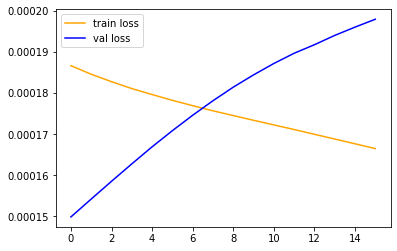

In [95]:
train_loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']
plt.plot(train_loss_1, label='train loss', c='orange')
plt.plot(val_loss_1, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

In [96]:
test_prediction_1 = []
test_actual = []
for x, y in dataset_test:
    test_actual.append(y[0][0])
    predict_res = model1.predict(x)[0][0]
    test_prediction_1.append(predict_res)
test_prediction_1 = np.array(test_prediction_1)
test_actual = np.array(test_actual)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

rmse1 = mean_squared_error(test_actual, test_prediction_1, squared=False)
mape1 = mean_absolute_percentage_error(test_actual, test_prediction_1)
mae1 = mean_absolute_error(test_actual, test_prediction_1)

print('result evaluation')
print('RMSE: ', rmse1)
print('MAPE: ', mape1)
print('MAE:  ', mae1)

result evaluation
RMSE:  0.026265707404194233
MAPE:  0.03307194541076037
MAE:   0.02224181480572853


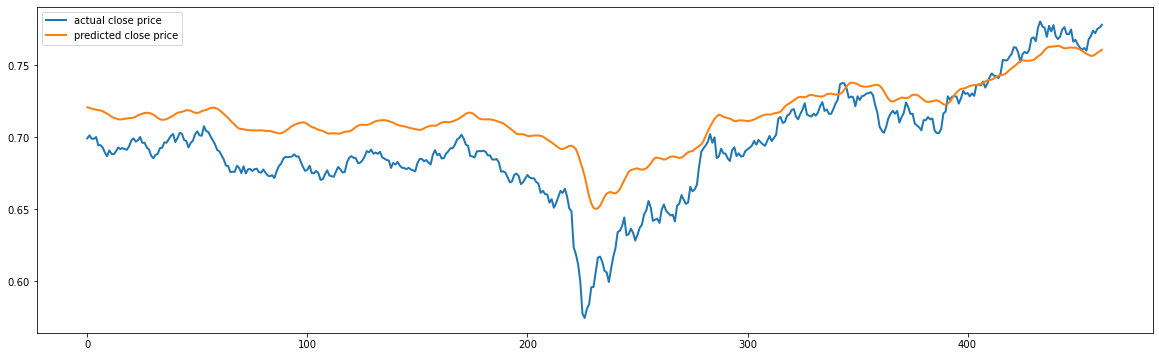

In [99]:
x_axis = [x for x in range(test_actual.shape[0])]
plt.figure(figsize=(20,6))

sns.lineplot(x=x_axis, y=test_actual, label='actual close price', linewidth=2)
sns.lineplot(x=x_axis, y=test_prediction_1, label='predicted close price', linewidth=2)
plt.legend()
plt.show()